# Multioutput(-multiclass) classification
* Each label can be a multiclass
* Example using cleanup of random noise added to training and test data
    * y is the cleaned up trauining data in this case
    

In [4]:

from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784',version = 1)
X,y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
# mnist784 is already in random order, so just take the final 10k out of 70 k as test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# X is images with aritifical noise
# Y is the original clean image

noise=np.random.randint(0,100,(len(X_train),784))
X_train_noisy = X_train + noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_noisy = X_test + noise

y_train_noisy = X_train
y_test_noisy = X_test

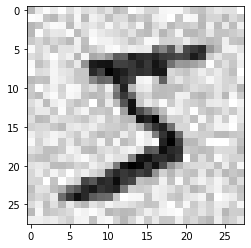

In [6]:
import matplotlib.pyplot as plt
sample_digit = X_train.iloc[0].to_numpy()
sample_digit_image = sample_digit.reshape(28,28)
plt.imshow(sample_digit_image, cmap="binary")
plt.show()

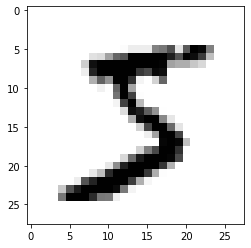

In [8]:
sample_digit = y_train_noisy.iloc[0].to_numpy()
sample_digit_image = sample_digit.reshape(28,28)
plt.imshow(sample_digit_image, cmap="binary")
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf_noisy = KNeighborsClassifier()
knn_clf_noisy.fit(X_train_noisy,y_train_noisy)
output = knn_clf_noisy.predict(X_test_noisy.iloc[1].to_numpy().reshape(1, -1))

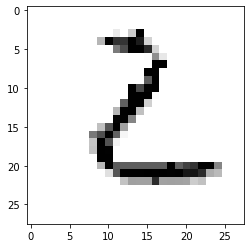

In [16]:
output_image = output.reshape(28,28)
plt.imshow(output_image, cmap="binary")
plt.show()

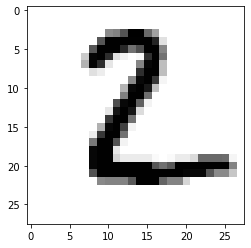

In [17]:
sample_digit = y_test_noisy.iloc[1].to_numpy()
sample_digit_image = sample_digit.reshape(28,28)
plt.imshow(sample_digit_image, cmap="binary")
plt.show()

* Will never be an exact match - since its picking the closest example from the training set to represent the test set